# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [39]:
# carregando os pacotes

import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
# Teste de Heterocedasticidade - Breusch-Pagan
import statsmodels.stats.api as sms

from patsy import dmatrices

# Teste de normalidade dos resíduos - Shapiro-Wilk
from scipy.stats import shapiro
import scipy.stats as stats

In [40]:
# carregando a base

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [41]:
# 1

# Fórmula para o modelo: tip ~ sex + smoker + size + net_bill
formula = 'tip ~ sex + smoker + size + net_bill'

# Criação das matrizes de design (X) e resposta (y)
y, X = dmatrices(formula, data=tips, return_type='dataframe')

# Visualizando as primeiras linhas da matriz X (design) e y (resposta)
print("Matriz de design (X):")
print(X.head())

print("\nMatriz de resposta (y):")
print(y.head())

Matriz de design (X):
   Intercept  sex[T.Female]  smoker[T.No]  size  net_bill
0        1.0            1.0           1.0   2.0     15.98
1        1.0            0.0           1.0   3.0      8.68
2        1.0            0.0           1.0   3.0     17.51
3        1.0            0.0           1.0   2.0     20.37
4        1.0            1.0           1.0   4.0     20.98

Matriz de resposta (y):
    tip
0  1.01
1  1.66
2  3.50
3  3.31
4  3.61


In [42]:
# Ajustar o modelo de regressão com statsmodels para julgar o nível de significância das variáveis
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     34.93
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           5.78e-23
Time:                        19:32:41   Log-Likelihood:                -368.79
No. Observations:                 244   AIC:                             747.6
Df Residuals:                     239   BIC:                             765.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8479      0.236      3.590

### Alguns fatos a se considerar no OLS Regression Results acima

- É fato que ao usar o método **summary()** do **statsmodels**, para obter o nível de significância (valor-p) das variáveis explicativas, O mesmo apresenta uma tabela que inclui os coeficientes das variáveis, seus erros padrão, valores t, e os respectivos p-valores. Esses p-valores indicam o nível de significância de cada variável no modelo.

- P>|t|: É o p-valor associado ao teste de hipótese de que o coeficiente da variável é igual a zero (não tem efeito significativo). Um p-valor pequeno (geralmente menor que 0.05) indica que a variável é significativa no modelo.

- Critérios comuns para o nível de significância: P-valor < 0.01: Significância muito forte, P-valor < 0.05: Significância forte, P-valor < 0.10: Significância fraca.

### Interpretação do nível de significância das variáveis presentes no dataframe:

- As variáveis size (tamanho da mesa) e net_bill (conta líquida) são estatisticamente significativas, pois seus p-valores são muito baixos (< 0.01), indicando que têm um impacto claro no valor da gorjeta.

- As variáveis sex[T.Female] e smoker[T.No] não são significativas (p-valores > 0.05), sugerindo que o sexo e o fato de ser ou não fumante não têm impacto relevante nas gorjetas, neste modelo.

In [43]:
# 2

# Nova fórmula com apenas variáveis significativas
formula = 'tip ~ size + net_bill'

# Criação das novas matrizes de design (X) e resposta (y)
y, X = dmatrices(formula, data=tips, return_type='dataframe')

# Ajuste do novo modelo de regressão
model = sm.OLS(y, X).fit()

# Exibir o resumo do novo modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     70.44
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           8.15e-25
Time:                        19:32:41   Log-Likelihood:                -368.79
No. Observations:                 244   AIC:                             743.6
Df Residuals:                     241   BIC:                             754.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8479      0.209      4.057      0.0

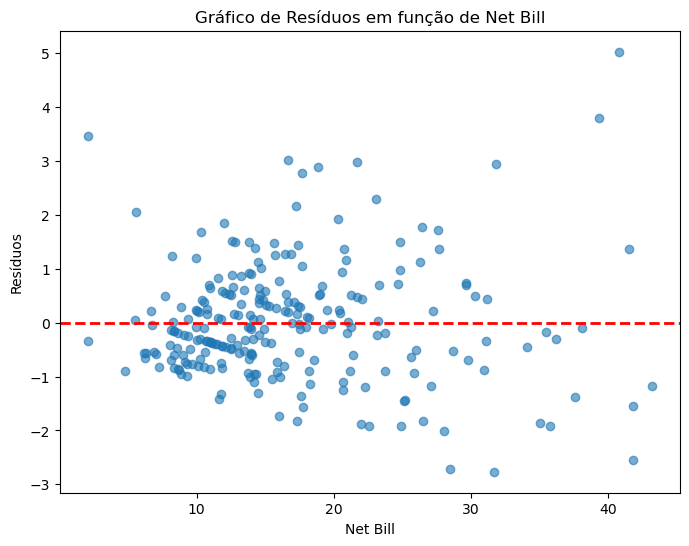

In [44]:
# 3

# Ajustar o modelo com as variáveis significativas
formula = 'tip ~ size + net_bill'
y, X = dmatrices(formula, data=tips, return_type='dataframe')
model = sm.OLS(y, X).fit()

# Calcular os resíduos
residuals = model.resid

# Plotar gráfico de resíduos vs net_bill
plt.figure(figsize=(8, 6))
plt.scatter(tips['net_bill'], residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Gráfico de Resíduos em função de Net Bill')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.show()

In [45]:
# 4 seguindo os seguintes passos:

# Primeiro criar um modelo com log(net_bill)
# Segundo criar um modelo com um polinômio de grau 2 (quadrático) para net_bill
# Terceiro comparar os resultados dos modelos com base no R2 e nos p-valores

# Modelo com log(net_bill)
formula_log = 'tip ~ size + np.log(net_bill)'

# Modelo com polinômio de grau 2 (quadrático)
formula_poly = 'tip ~ size + np.power(net_bill, 2) + net_bill'

# Criar as matrizes de design e ajustar os dois modelos
y_log, X_log = dmatrices(formula_log, data=tips, return_type='dataframe')
y_poly, X_poly = dmatrices(formula_poly, data=tips, return_type='dataframe')

# Ajustar os modelos
model_log = sm.OLS(y_log, X_log).fit()
model_poly = sm.OLS(y_poly, X_poly).fit()

# Exibir os resumos dos modelos
print("Modelo com log(net_bill):")
print(model_log.summary())

print("\nModelo com polinômio (net_bill^2):")
print(model_poly.summary())

Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     63.02
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           9.66e-23
Time:                        19:32:42   Log-Likelihood:                -373.63
No. Observations:                 244   AIC:                             753.3
Df Residuals:                     241   BIC:                             763.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept     

### Interpretação dos modelos acima:

- O modelo polinomial tem um R² ligeiramente melhor (0.369 vs. 0.343), sugerindo que ele explica um pouco mais da variabilidade dos dados.

- No modelo com log, tanto size quanto np.log(net_bill) são altamente significativos.

- No modelo polinomial, o termo quadrático (net_bill²) não é significativo (p-valor = 0.700), enquanto o termo linear de net_bill é significativo, mas com menor impacto.

- Modelo com log: Apesar de ter um R² ligeiramente menor, esse modelo é mais simples e possui variáveis mais significativas, o que pode torná-lo preferível.

- Modelo polinomial: Embora tenha um R² ligeiramente melhor, o termo quadrático não é significativo, o que reduz a sua utilidade prática.

- Por fim o modelo com log de net_bill é preferível, pois é mais simples, tem variáveis significativas e explica bem os dados.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [46]:
# 1

# Fórmula do modelo, agora utilizando o log de 'tip'
formula = 'np.log(tip) ~ sex + smoker + day + net_bill'

# Criação das matrizes de design (X) e resposta (y) usando o Patsy
y, X = dmatrices(formula, data=tips, return_type='dataframe')

# Exibir as primeiras linhas de X e y
print("Matriz de Design (X):")
print(X.head())

print("\nMatriz de Resposta (y):")
print(y.head())

Matriz de Design (X):
   Intercept  sex[T.Female]  smoker[T.No]  day[T.Fri]  day[T.Sat]  day[T.Sun]  \
0        1.0            1.0           1.0         0.0         0.0         1.0   
1        1.0            0.0           1.0         0.0         0.0         1.0   
2        1.0            0.0           1.0         0.0         0.0         1.0   
3        1.0            0.0           1.0         0.0         0.0         1.0   
4        1.0            1.0           1.0         0.0         0.0         1.0   

   net_bill  
0     15.98  
1      8.68  
2     17.51  
3     20.37  
4     20.98  

Matriz de Resposta (y):
   np.log(tip)
0     0.009950
1     0.506818
2     1.252763
3     1.196948
4     1.283708


In [47]:
# 2

# Fórmula original com todas as variáveis
formula = 'np.log(tip) ~ sex + smoker + day + net_bill'

# Criar as matrizes de design (X) e resposta (y)
y, X = dmatrices(formula, data=tips, return_type='dataframe')

# Ajustar o modelo
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo para verificar as variáveis significativas
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     18.75
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           7.85e-18
Time:                        19:32:42   Log-Likelihood:                -95.867
No. Observations:                 244   AIC:                             205.7
Df Residuals:                     237   BIC:                             230.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4554      0.082      5.527

In [48]:
# Nova fórmula com apenas a variável significativa
formula_updated = 'np.log(tip) ~ net_bill'

# Criar a nova matriz de design (X) e resposta (y)
y_updated, X_updated = dmatrices(formula_updated, data=tips, return_type='dataframe')

# Ajustar o novo modelo
model_updated = sm.OLS(y_updated, X_updated).fit()

# Exibir o resumo do novo modelo
print(model_updated.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           2.60e-21
Time:                        19:32:42   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

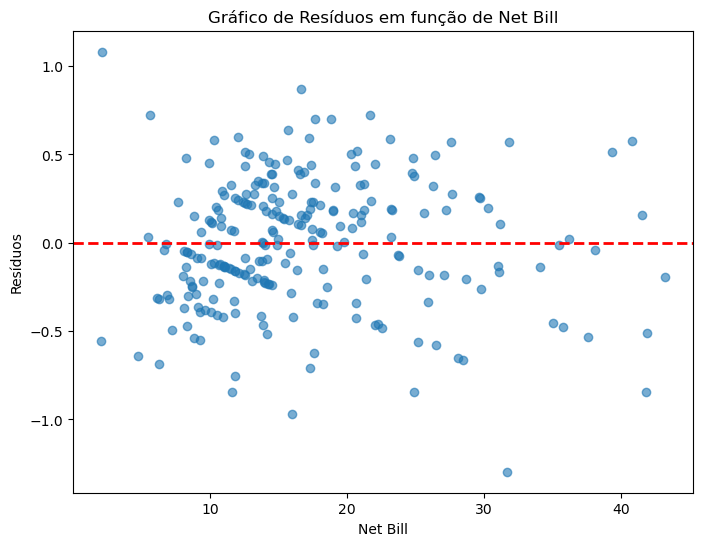

In [49]:
# 3

# Ajustar o modelo com apenas 'net_bill'
formula_updated = 'np.log(tip) ~ net_bill'
y_updated, X_updated = dmatrices(formula_updated, data=tips, return_type='dataframe')
model_updated = sm.OLS(y_updated, X_updated).fit()

# Calcular os resíduos
residuals = model_updated.resid

# Plotar gráfico de resíduos vs net_bill
plt.figure(figsize=(8, 6))
plt.scatter(tips['net_bill'], residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Gráfico de Resíduos em função de Net Bill')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.show()

In [50]:
# 4

# Modelo com log(net_bill)
formula_log = 'np.log(tip) ~ np.log(net_bill)'

# Modelo com polinômio de grau 2 (quadrático)
formula_poly = 'np.log(tip) ~ net_bill + np.power(net_bill, 2)'

# Criar as matrizes de design e ajustar os modelos
y_log, X_log = dmatrices(formula_log, data=tips, return_type='dataframe')
y_poly, X_poly = dmatrices(formula_poly, data=tips, return_type='dataframe')

model_log = sm.OLS(y_log, X_log).fit()
model_poly = sm.OLS(y_poly, X_poly).fit()

# Exibir os resumos dos modelos
print("Modelo com log(net_bill):")
print(model_log.summary())

print("\nModelo com polinômio (net_bill^2):")
print(model_poly.summary())

Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           5.62e-22
Time:                        19:32:42   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept     

### Interpretação dos modelos acima:

- O modelo com polinômio tem um R² ligeiramente melhor (0.338) em comparação com o modelo com log(net_bill) (0.319). Isso sugere que o modelo polinomial explica um pouco mais da variabilidade dos dados.

- No modelo com log(net_bill), a variável np.log(net_bill) é altamente significativa, e o intercepto também é significativo.

- No modelo com polinômio, tanto net_bill quanto np.power(net_bill, 2) são altamente significativos, embora o intercepto seja apenas marginalmente significativo.

- Modelo com log(net_bill): Mais simples, com uma única transformação de variável, e possui variáveis significativas. No entanto, seu R² é ligeiramente menor.

- Modelo com Polinômio (net_bill²): Oferece um ajuste ligeiramente melhor (R² mais alto) e inclui uma transformação quadrática, que pode capturar relações não lineares. Todos os coeficientes são significativos, exceto o intercepto que é marginal.

- Dado que o modelo com polinômio tem um R² melhor e as variáveis são todas significativas, ele pode ser preferível se o objetivo for capturar a relação não linear entre net_bill e a gorjeta. No entanto, se a simplicidade do modelo for uma prioridade, o modelo com log(net_bill) é mais simples e pode ser mais fácil de interpretar.

In [51]:
5 #

# Prever valores na escala logarítmica
y_pred_log = model_poly.predict(X_poly)

# Reverter a transformação logarítmica
y_pred = np.exp(y_pred_log)

# Criar a matriz de design para o modelo de `tip` sem transformação
formula_original = 'tip ~ net_bill + np.power(net_bill, 2)'
y_original, X_original = dmatrices(formula_original, data=tips, return_type='dataframe')

# Ajustar o modelo
model_original = sm.OLS(y_original, X_original).fit()

# Exibir o resumo do modelo para verificar o R²
print("Resumo do modelo com net_bill e net_bill^2 na escala original:")
print(model_original.summary())

Resumo do modelo com net_bill e net_bill^2 na escala original:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           4.96e-22
Time:                        19:32:42   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

### Comparando com o modelo do item 1 e respondendo qual tem melhor coeficiente de determinação?

- Por fim o modelo com log de net_bill do exercicío 2 ainda é preferível, pois indica a proporção da variabilidade da variável dependente que é explicada pelo modelo. Modelos com R² mais alto geralmente explicam melhor a variabilidade nos dados e nesse caso o mesmo tem 0.343, ou seja, um R² maior

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [52]:
# Carregar o dataset
data = pd.read_csv('./previsao_de_renda.csv')

# Tratar valores ausentes e infinitos
data_cleaned = data[['tempo_emprego', 'renda']].replace([float('inf'), float('-inf')], pd.NA).dropna()

# Verificar colunas
print(data_cleaned.columns)

Index(['tempo_emprego', 'renda'], dtype='object')


In [53]:
# Separar variáveis independentes e dependentes
X_clean = data_cleaned[['tempo_emprego']]
y_clean = data_cleaned['renda']

# Adicionar uma constante ao modelo (intercepto)
X_clean = sm.add_constant(X_clean)

# Ajustar o modelo de regressão linear
model_clean = sm.OLS(y_clean, X_clean).fit()

# Obter o resumo do modelo
print(model_clean.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:32:42   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409

In [54]:
# Separar variáveis independentes e dependentes
X_clean = data_cleaned[['tempo_emprego']]
y_clean = data_cleaned['renda']

# Adicionar uma constante ao modelo (intercepto)
X_clean = sm.add_constant(X_clean)

# Ajustar o modelo de regressão linear
model_clean = sm.OLS(y_clean, X_clean).fit()

# Obter o resumo do modelo
print(model_clean.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:32:42   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409

C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


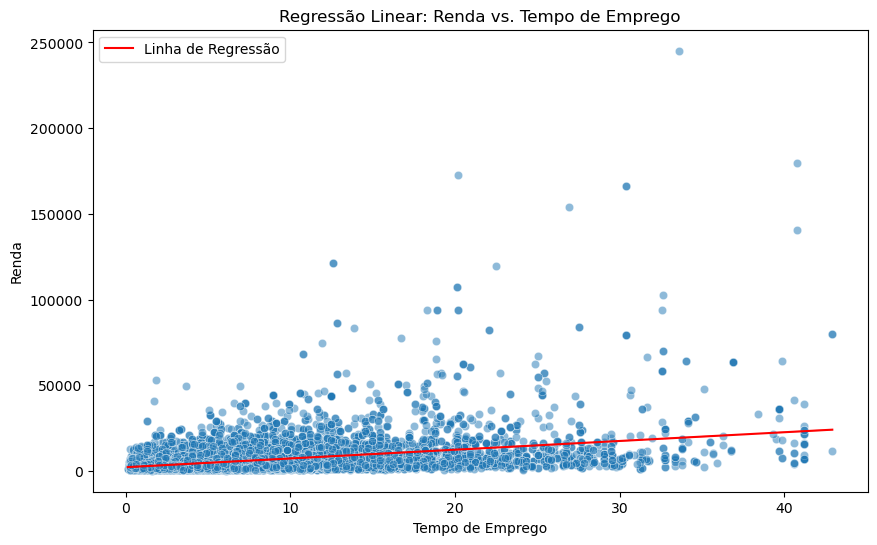

In [55]:
# Criar gráfico de dispersão e linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='tempo_emprego', y='renda', alpha=0.5)
sns.lineplot(x=data_cleaned['tempo_emprego'], y=model_clean.predict(X_clean), color='red', label='Linha de Regressão')
plt.title('Regressão Linear: Renda vs. Tempo de Emprego')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')
plt.legend()
plt.show()

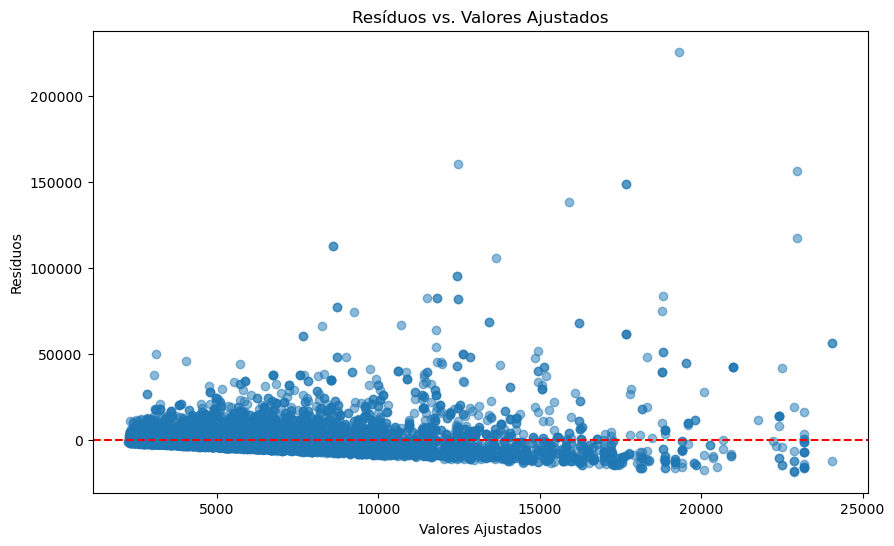

In [56]:
# 2

# Obter valores ajustados e resíduos
y_pred = model_clean.predict(X_clean)
residuos = y_clean - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Resíduos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

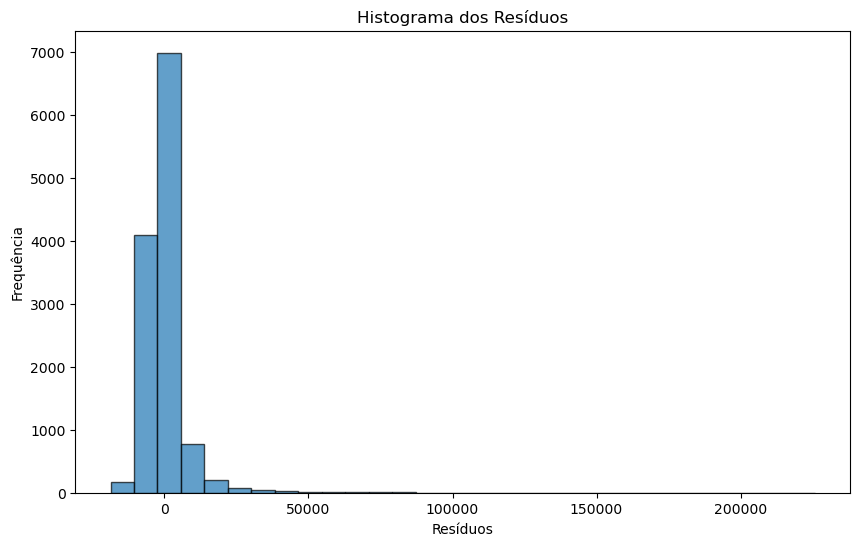

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

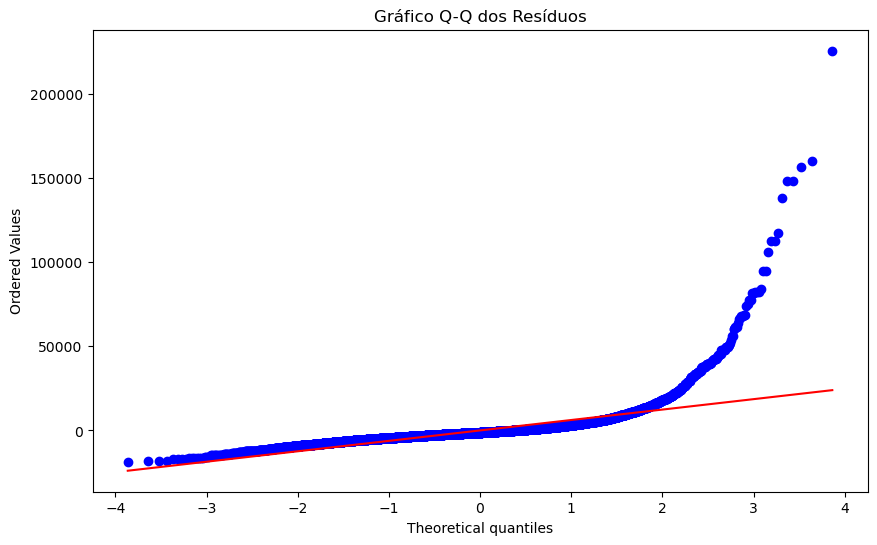

In [58]:
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()

### Algumas conclusões

- Heterocedasticidade: Se os resíduos mostraram padrões de funil, pode ser necessário transformar as variáveis ou ajustar o modelo para lidar com a heterocedasticidade.

- Normalidade: Se os resíduos não são normalmente distribuídos, o modelo pode precisar de ajustes ou uma transformação adicional nas variáveis.

In [59]:
# 3

# Verificar valores únicos nas colunas que são categóricas
print("Valores únicos nas colunas categóricas:")
for col in ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']:
    print(f"{col}: {data[col].unique()}")

# Substituir valores não numéricos por NaN e converter colunas específicas para numérico
data['tempo_emprego'] = pd.to_numeric(data['tempo_emprego'], errors='coerce')
data['renda'] = pd.to_numeric(data['renda'], errors='coerce')

# Remover possíveis NaN e valores infinitos
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Criar variáveis dummies para as colunas categóricas
data_dummies = pd.get_dummies(data, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 
                                             'tipo_renda', 'educacao', 'estado_civil', 
                                             'tipo_residencia'], drop_first=True)

# Transformar a variável renda em log
data_dummies['renda_log'] = np.log(data_dummies['renda'])

# Remover colunas não explicativas
columns_to_drop = ['renda', 'data_ref', 'index']  # Adicionar qualquer outra variável irrelevante
X = data_dummies.drop(columns=columns_to_drop, errors='ignore')

# Converter qualquer coluna restante para numérico
# Use astype to convert all columns to numeric
X = X.astype(float)

# Tratar valores ausentes em X
X = X.dropna(axis=1, how='any')

# Adicionar constante para o modelo
X = sm.add_constant(X)

# Preparar a variável resposta
y = data_dummies['renda_log']

# Ajustar o modelo de regressão linear múltipla
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())

Valores únicos nas colunas categóricas:
sexo: ['F' 'M']
posse_de_veiculo: [False  True]
posse_de_imovel: [ True False]
tipo_renda: ['Empresário' 'Assalariado' 'Servidor público' 'Pensionista' 'Bolsista']
educacao: ['Secundário' 'Superior completo' 'Superior incompleto' 'Primário'
 'Pós graduação']
estado_civil: ['Solteiro' 'Casado' 'Viúvo' 'União' 'Separado']
tipo_residencia: ['Casa' 'Governamental' 'Com os pais' 'Aluguel' 'Estúdio' 'Comunitário']
                            OLS Regression Results                            
Dep. Variable:              renda_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.428e+28
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:33:40   Log-Likelihood:             3.5171e+05
No. Observations:               12427   AIC:                        -7.034

In [60]:
# 4

# Remover variáveis não significantes com p-value > 0.05
vars_to_remove = modelo.pvalues[modelo.pvalues > 0.05].index
X_reduced = X.drop(columns=vars_to_remove)

# Ajustar o modelo novamente
modelo_reduzido = sm.OLS(y, X_reduced).fit()

# Exibir o resumo do modelo final
print(modelo_reduzido.summary())

                                 OLS Regression Results                                
Dep. Variable:              renda_log   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.633e+32
Date:                Tue, 10 Sep 2024   Prob (F-statistic):                        0.00
Time:                        19:33:40   Log-Likelihood:                      3.7869e+05
No. Observations:               12427   AIC:                                 -7.574e+05
Df Residuals:                   12422   BIC:                                 -7.573e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [61]:
# Verificar valores únicos nas colunas que são categóricas
print("Valores únicos nas colunas categóricas:")
for col in ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']:
    print(f"{col}: {data[col].unique()}")

# Substituir valores não numéricos por NaN e converter colunas específicas para numérico
data['tempo_emprego'] = pd.to_numeric(data['tempo_emprego'], errors='coerce')
data['renda'] = pd.to_numeric(data['renda'], errors='coerce')

# Remover possíveis NaN e valores infinitos
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Criar variáveis dummies para as colunas categóricas
data_dummies = pd.get_dummies(data, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 
                                             'tipo_renda', 'educacao', 'estado_civil', 
                                             'tipo_residencia'], drop_first=True)

# Transformar a variável renda em log
data_dummies['renda_log'] = np.log(data_dummies['renda'])

# Remover colunas não explicativas
columns_to_drop = ['renda', 'data_ref', 'index']  # Adicionar qualquer outra variável irrelevante
X = data_dummies.drop(columns=columns_to_drop, errors='ignore')

# Converter todas as colunas restantes para numérico
X = X.astype(float)

# Tratar valores ausentes em X
X = X.dropna(axis=1, how='any')

# Adicionar constante para o modelo
X = sm.add_constant(X)

# Preparar a variável resposta
y = data_dummies['renda_log']

# Ajustar o modelo de regressão linear múltipla
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())

Valores únicos nas colunas categóricas:
sexo: ['F' 'M']
posse_de_veiculo: [False  True]
posse_de_imovel: [ True False]
tipo_renda: ['Empresário' 'Assalariado' 'Servidor público' 'Bolsista' 'Pensionista']
educacao: ['Secundário' 'Superior completo' 'Superior incompleto' 'Primário'
 'Pós graduação']
estado_civil: ['Solteiro' 'Casado' 'Viúvo' 'União' 'Separado']
tipo_residencia: ['Casa' 'Governamental' 'Com os pais' 'Aluguel' 'Estúdio' 'Comunitário']
                            OLS Regression Results                            
Dep. Variable:              renda_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.428e+28
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:33:40   Log-Likelihood:             3.5171e+05
No. Observations:               12427   AIC:                        -7.034

In [62]:
# 5

# Ajuste do modelo já foi feito anteriormente
# modelo = sm.OLS(y, X).fit()

# Obter resíduos e valores ajustados
residuos = modelo.resid
valores_ajustados = modelo.fittedvalues

Text(0.5, 1.0, 'Resíduos vs Valores Ajustados')

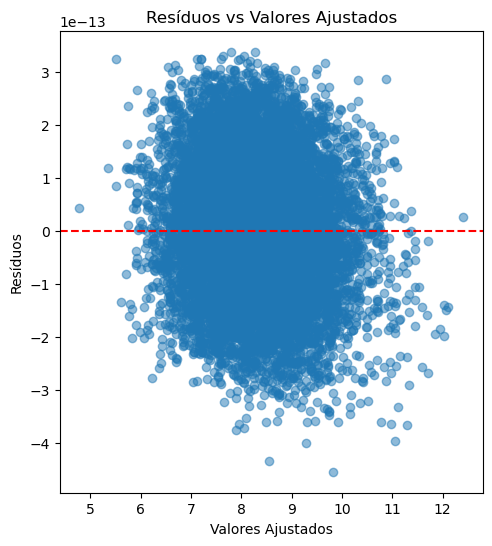

In [63]:
# Gráfico de resíduos vs valores ajustados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(valores_ajustados, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')

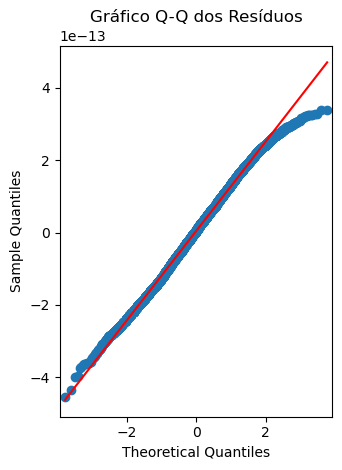

In [64]:
# Gráfico Q-Q para checar a normalidade dos resíduos
plt.subplot(1, 2, 2)
sm.qqplot(residuos, line='s', ax=plt.gca())
plt.title('Gráfico Q-Q dos Resíduos')

plt.tight_layout()
plt.show()

In [65]:
# Verificar a média e desvio padrão dos resíduos
print(f"Média dos resíduos: {residuos.mean()}")
print(f"Desvio padrão dos resíduos: {residuos.std()}")

# Teste de Breusch-Pagan
bp_test = sms.het_breuschpagan(residuos, X)
print(f"Breusch-Pagan p-valor: {bp_test[1]}")

shapiro_test = shapiro(residuos)
print(f"Shapiro-Wilk p-valor: {shapiro_test.pvalue}")

Média dos resíduos: 3.902781909241574e-15
Desvio padrão dos resíduos: 1.236493927056974e-13
Breusch-Pagan p-valor: 5.506659624296755e-37
Shapiro-Wilk p-valor: 2.249634296392928e-14


C:\Users\alima\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Explicação sobre o uso de alguns métodos acima:

1. Gráfico de Resíduos vs Valores Ajustados:

    - Verifica se os resíduos são aleatórios em relação aos valores ajustados. Padrões ou estrutura nos resíduos podem indicar problemas com o modelo (como não linearidade ou heterocedasticidade).
  
2. Gráfico Q-Q dos Resíduos:

    - Verifica se os resíduos seguem uma distribuição normal. Desvios significativos da linha diagonal podem indicar problemas com a normalidade dos resíduos.
  
3. Média e Desvio Padrão dos Resíduos:

    - Ajuda a verificar se a média dos resíduos está próxima de zero e o desvio padrão é razoável.

4. Teste de Heterocedasticidade - Breusch-Pagan:

    - Testa se a variância dos resíduos é constante. Um p-valor baixo indica heterocedasticidade.

5. Teste de Normalidade dos Resíduos - Shapiro-Wilk:

    - Testa a hipótese de que os resíduos são normalmente distribuídos. Um p-valor baixo indica que os resíduos não são normalmente distribuídos.